## Lab 2 Worksheet 

In this worksheet we look at two topographic methods for dimensionality reduction.
reference: https://www.datacamp.com/tutorial/introduction-t-sne

## t-distributed Stochastic Neighbourhood Embedding

The first code block contains useful imports and variable initialisations.

(Light-hearted quiz question - why is the number 1729 interesting?).


In [5]:
# Imports
import mnist_reader
import fashion_scatter as fs

import time
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

%matplotlib inline

RS = 1729; # Fix the random state for t-SNE. This makes the lab results reproducible.

The dataset you will use for this section of the lab class is the Fashion-MNIST dataset. This dataset consists of 28x28 grayscale image of 70,000 fashion products from 10 categories, with 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images.

The classes and their labels are given by the following list:
<ull>
    <li>0 T-shirt/top</li>
    <li>1 Trouser</li>
    <li>2 Pullover</li>
    <li>3 Dress</li>
    <li>4 Coat</li>
    <li>5 Sandal</li>
    <li>6 Shirt</li>
    <li>7 Sneaker</li>
    <li>8 Bag</li>
    <li>9 Ankle boot</li>
    </ul>

Use the function `load_mnist` provided on Blackboard to read the datasets into variables `X_train` (image data) and `y_train` (labels) and print the shape of `X_train`. The argument to `load_mnist` is the path where you have stored the image zip files relative to the directory that this notebook is stored in.

In [2]:
# TODO block 1
from mnist_reader import load_mnist
X_train, y_train = load_mnist("./")
X_train.shape

(60000, 784)

60,000 data points is a healthy size of dataset. But for running experiments, it will be more convenient to work with a smaller subset. Write code to take a slice of the first 1000 points from both the X and y arrays. Check that we have examples of all the labels by calling `np.unique` on the y subset.

In [3]:
#TODO block 2
xsubset=X_train[:1000]
ysubset=y_train[:1000]
u=np.unique(ysubset)
print(u)

[0 1 2 3 4 5 6 7 8 9]


Next we are going to apply PCA to this dataset and look at the resulting visualisation. Write code to apply the `PCA` class 
    from `sklearn.decomposition`, extracting four components. (Hint: you need two lines of code: one to call the constructor PCA to set the right number of components; the second should call the `fit_transform` function on `xsubset`. Look at the class documentation to see how to do this.)

Make a note of the time elapsed and the proportion of variance explained for these four components. 

In [4]:
# TODO block 3
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components = 4)
pca_result = pca.fit_transform(xsubset)

print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

PCA done! Time elapsed: 3.5992913246154785 seconds
Variance explained per principal component: [0.29550168 0.17639341 0.05725013 0.0538202 ]


In [5]:
pca_variance=pca.explained_variance_ratio_
pca_sum=sum(pca_variance)
pca_two=pca_variance[:2]
print(sum(pca_two))
print(pca_sum)
print(sum(pca_two)/pca_sum)

0.4718950891400679
0.5829654198175047
0.809473552115309


Use the first two components from the data frame in the cell below and 
call the function `fashion_scatter` to visualise the PCA output.

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

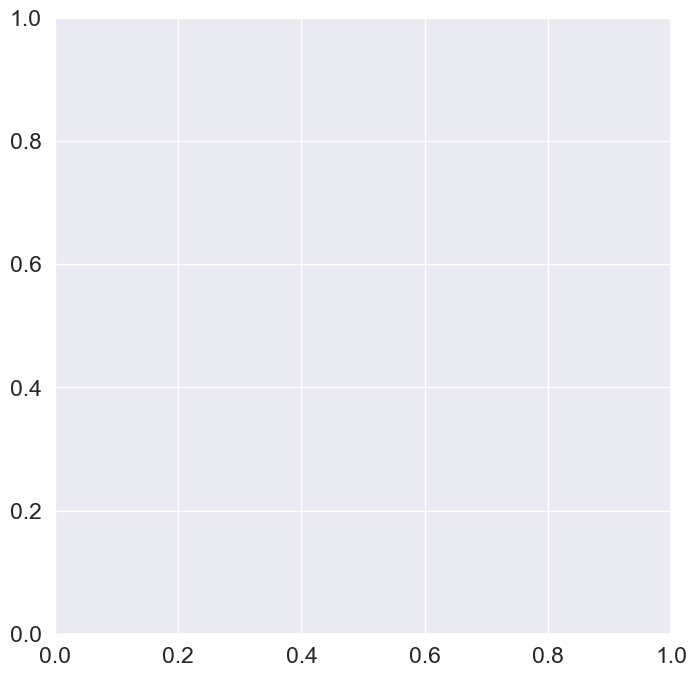

In [6]:
#TODO block 4
from fashion_scatter import fashion_scatter
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,ysubset) # Visualizing the PCA output


Next, write code to apply TSNE (from `sklearn.manifold`) to the same data subset and visualise the result: 
call the `fit_transform` function to do this. 
Also, add code to time how long it takes, print the value and record it. Be sure to pass the random state `RS` to the TSNE 
constructor.

In [ ]:
#TODO block 5
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(xsubset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)) 

Of course, in the original t-SNE paper, it was recommended to apply the algorithm after reducing the dimensionality of the
data to an intermediate range. Apply PCA again with 50 components 
(a significant reduction from the 784 dimensions of the original data) and then aply TSNE (again setting the random
state). Time how long this takes and display the results. 

In [ ]:
#TODO block 6
import time
time_start = time.time()
pca_50=PCA(n_components = 50)
pca_result_50 = pca_50.fit_transform(xsubset)
print(sum(pca_50.explained_variance_ratio_))
tsen_50=TSNE(random_state=RS)
fashion_pca_tsne = tsen_50.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)) 

Now run t-SNE with a perplexity value of 2 (the API can be found __[here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)__) and plot the result. Write down what effect reducing this parameter from its default value of 30.0 has had.

In [ ]:
#TODO block 7
fashion_scatter(fashion_pca_tsne, ysubset)
fashion_pca_tsne_2 = TSNE(random_state=RS, perplexity=2).fit_transform(pca_result_50)
fashion_scatter(fashion_pca_tsne_2, ysubset)

## UMAP

The next task is to create and fit a UMAP model and then project the data.

UMAP is <b>not</b> part of the standard Python packages but has been implemented as a separate library (located 
__[here](https://pypi.org/project/umap-learn/)__). There are several
ways to install the package. The one that I used was to create an Anaconda power shell (an option from the Windows 
application selector) and in that shell to type

`
pip install umap-learn
`
### Digit data
We will use the small digit dataset that is part of the sklearn package, for convenience.

In [1]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

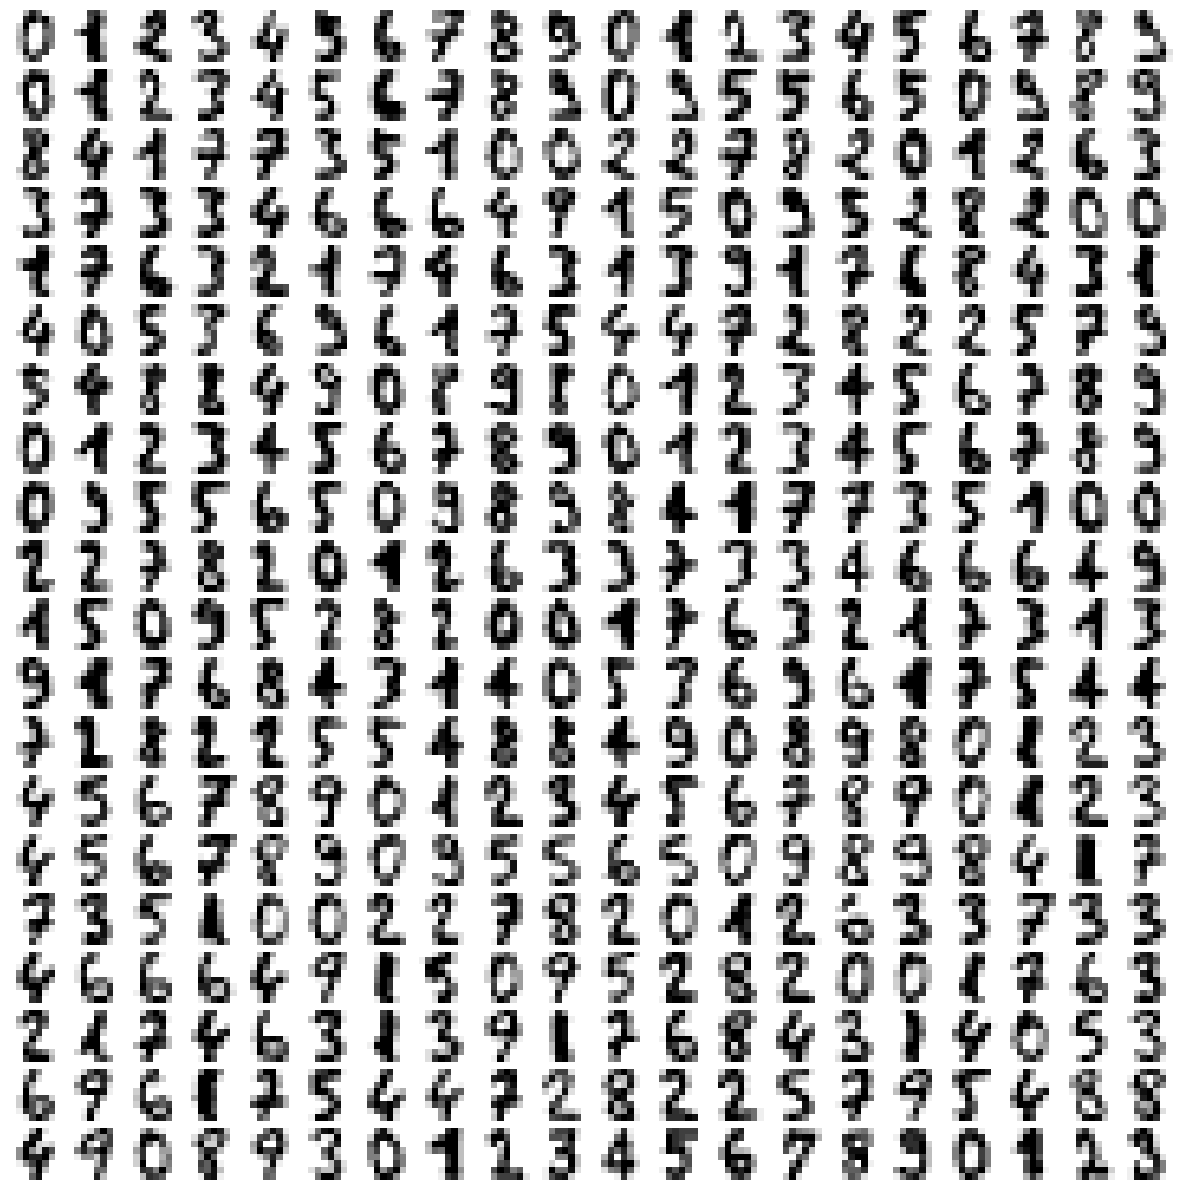

In [2]:
digits = load_digits()
fig, ax_array = plt.subplots(20, 20, figsize=(12, 12))
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01);

Once you have installed the package, call the `fit` and `transform` functions to create an array `embedding` which contains the
embedded data. The UMAP API guide can be found __[here](https://umap-learn.readthedocs.io/en/latest/api.html)__

In [6]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
#TODO block 8
umap_2d = umap.UMAP(random_state=RS)
umap_2d.fit(digits.data)
embedding=umap_2d.transform(digits.data)
embedding

array([[15.468999  , 10.744018  ],
       [-4.6453733 , 10.067961  ],
       [-2.1264236 , 10.143053  ],
       ...,
       [-2.5681038 ,  8.704969  ],
       [ 0.25848377,  4.0707726 ],
       [-2.0460968 ,  8.788989  ]], dtype=float32)

The next block of code plots the data with a colour-coding based on the digit class.

/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_10530/3557907087.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))


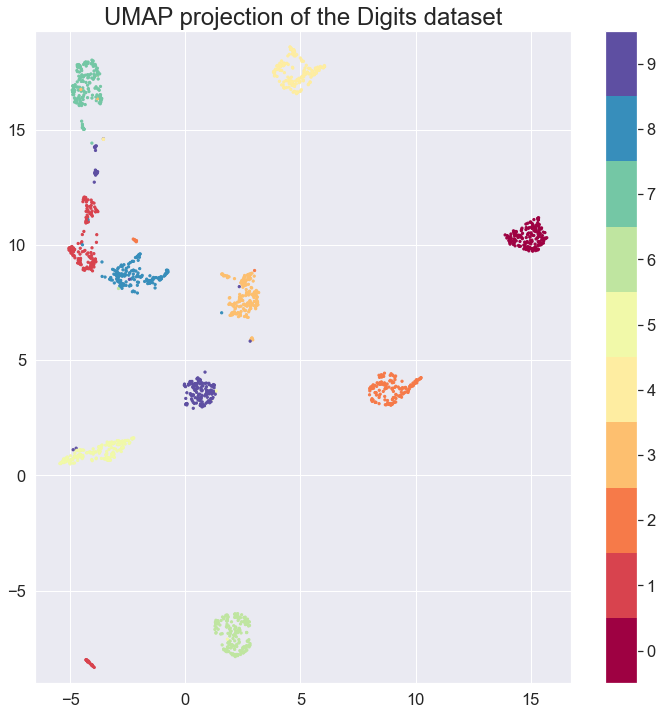

In [69]:
plt.figure(figsize=(12, 12))

plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

Review this graphic and write down any points of interest.

### Colour cube dataset
We will now use a second dataset to experiment with some of the parameters of the UMAP algorithm. The next block of code defines a function that will be useful to run the experiments.

In [70]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title='', init = 'spectral'):
    fit = umap.UMAP(
        random_state = 42,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        init = init
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title(title, fontsize=18)



The next block of code creates a four-dimensional dataset randomly sampled. We interpret each row as a tuple of (R,G,B,a) values specifying a color (and translucency). Thus when we plot low-dimensional representations each point can be colored according to its 4-dimensional value.

In [71]:
# Exploration of parameters
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})
np.random.seed(42)
data = np.random.rand(800, 4)

Now fit a UMAP model to the data and transform it into a variable `u`. Time how long it takes.

In [72]:
# TODO block 9
import time
time_start=time.time()

umap_fit=umap.UMAP(random_state=RS)
umap_fit.fit(data)
u=umap_fit.transform(data)
u
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 1.136324167251587 seconds


Now we will carry out experiments using `draw_umap`. Run the next block of code (where we set the number of neigbours to 2) and write down what happens. 

/Users/yujiewang/anaconda3/lib/python3.9/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


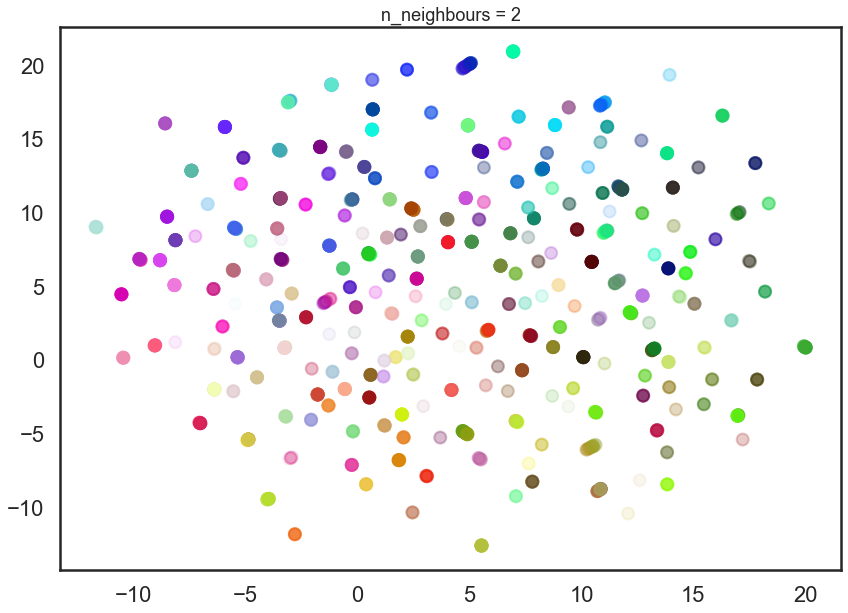

In [73]:
n=2
draw_umap(n, title='n_neighbours = {}'.format(n))

This parameter controls how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighbourhood UMAP considers when attempting to learn the manifold structure of the data. 

Write some code using `draw_umap` to create scatter plots using UMAP for 5, 10, 50, 100, 200 neighbours. Write down what you notice about the effects of this parameter on the results.
reference link: https://umap-learn.readthedocs.io/en/latest/parameters.html

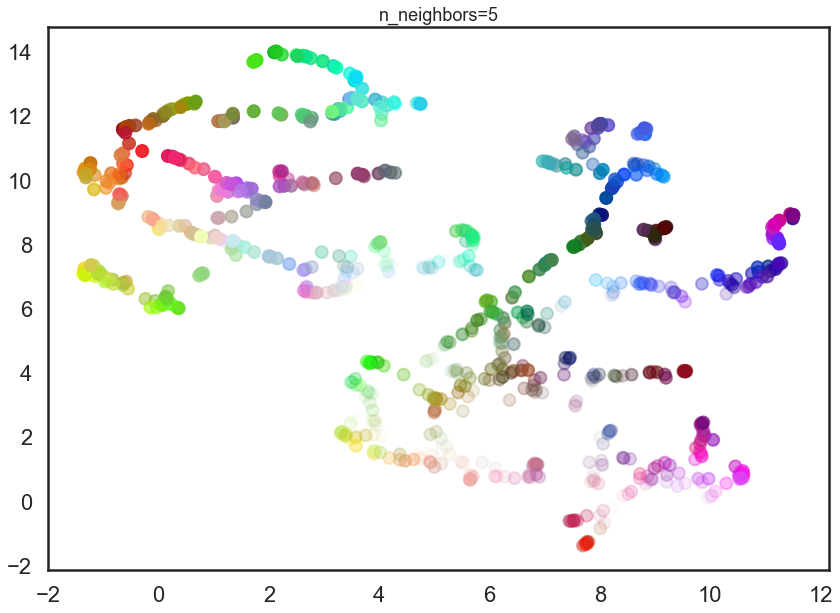

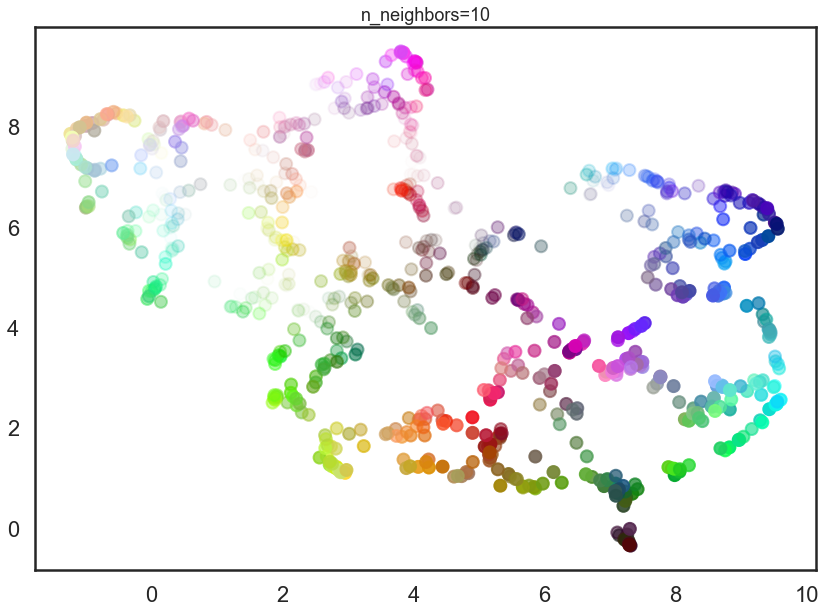

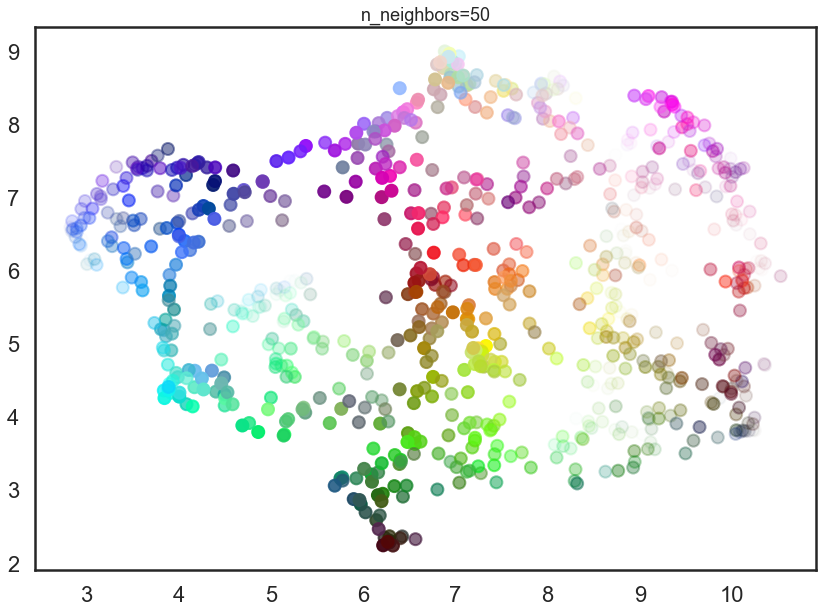

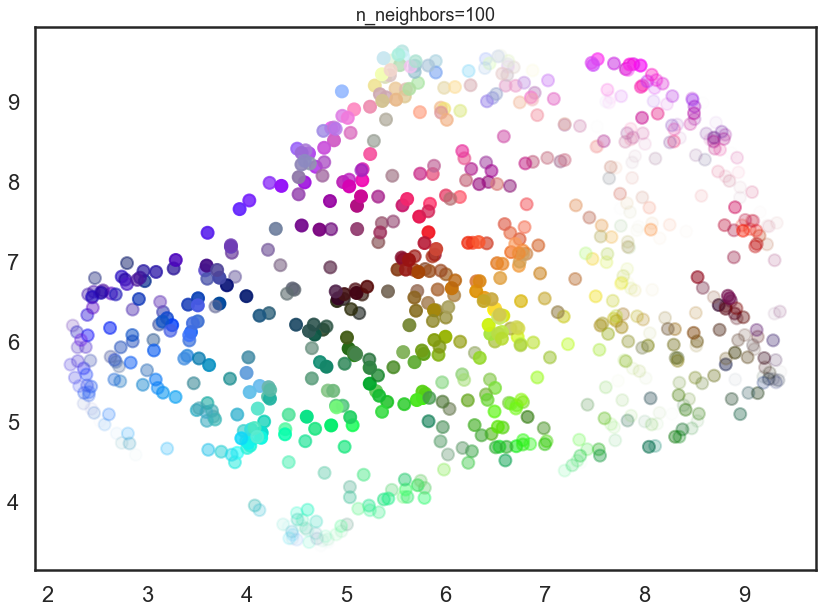

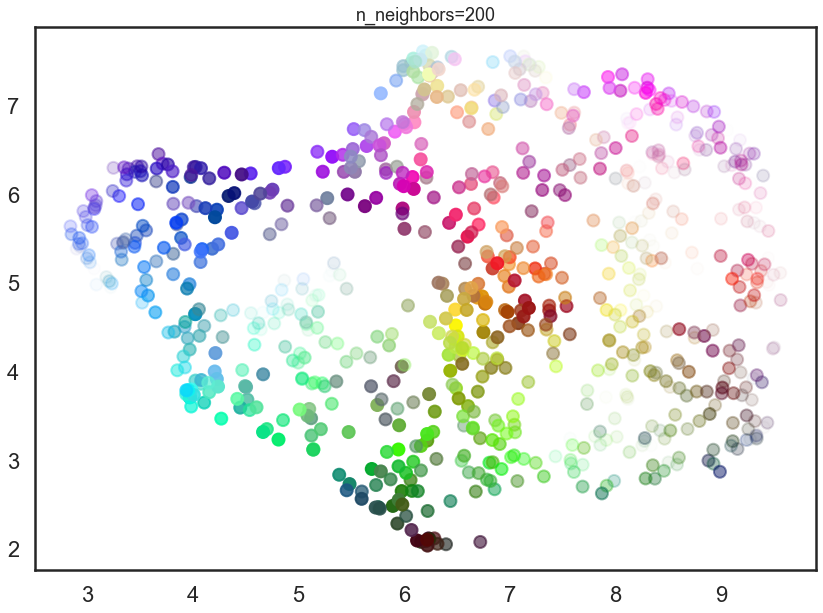

In [74]:
#TODO block 10
for n in (5,10,50,100,200):
    draw_umap(n_neighbors=n, title='n_neighbors={}'.format(n))

Write some code to vary the paramet `min_dist` over values 0.0, 0.1, 0.25, 0.8, and 0.99. Write down what you notice about the effects of the this parameter on the results. The `min_dist` parameter controls how tightly UMAP is allowed to pack points together. It defines the minimum distance apart that points are allowed to be in the low-dimensional representation.

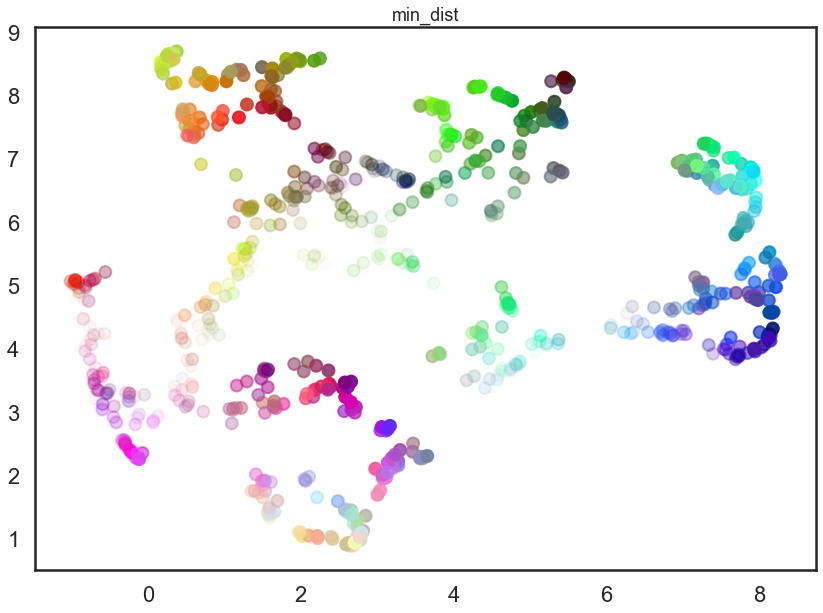

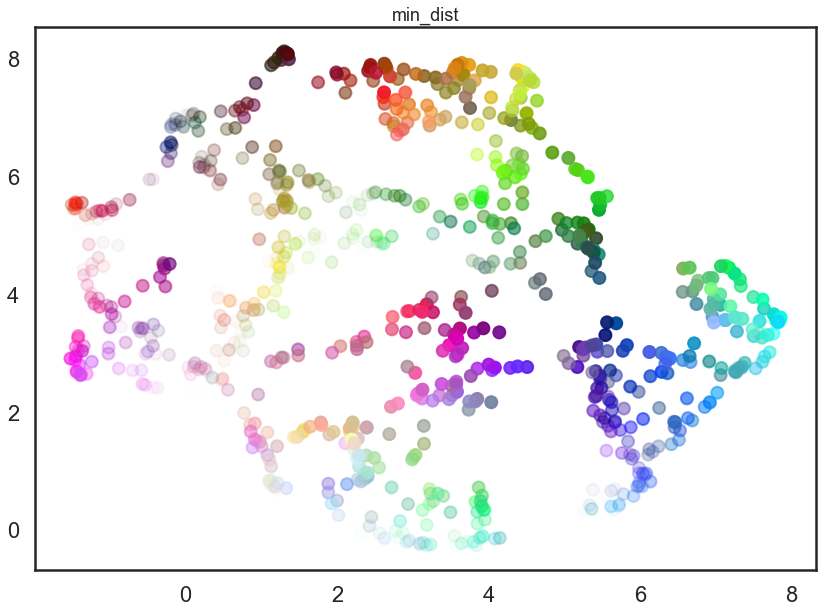

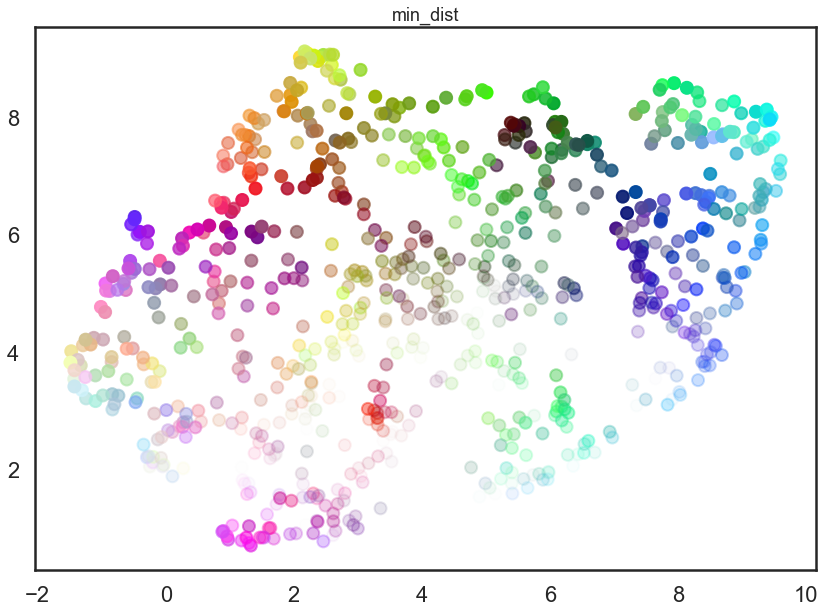

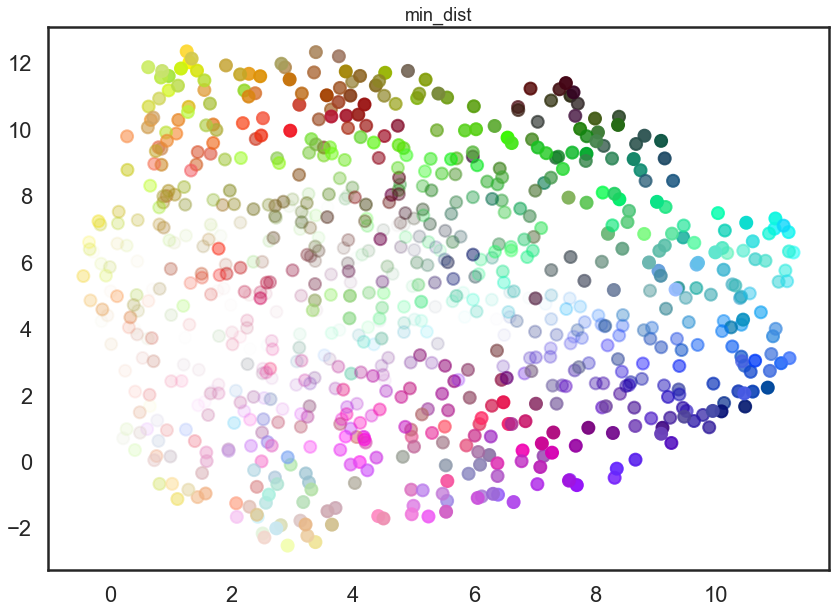

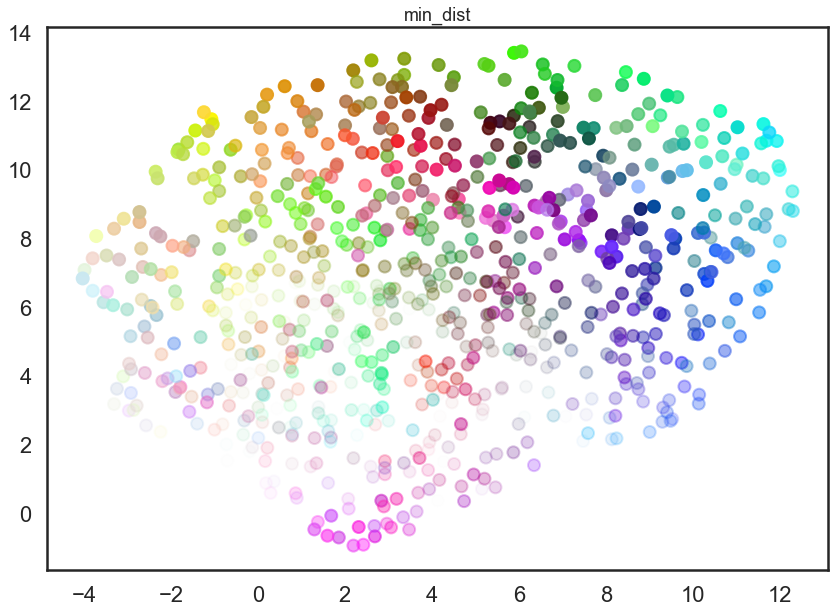

In [75]:
# TODO block 11
for d in (0.0,0.1,0.25,0.8,0.99):
    draw_umap(min_dist=d,title='min_dist')